In [1]:
import tensorflow as tf
print(tf.__version__)
# from Ipython import display
from matplotlib import pyplot as plt
import random
%matplotlib inline

2.0.0


## 3.2.1 gen_dataset

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = tf.random.normal((num_examples, num_inputs),stddev = 1)
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += tf.random.normal(labels.shape,stddev=0.01)

features[0], labels[0]

(<tf.Tensor: id=31, shape=(2,), dtype=float32, numpy=array([0.24220389, 0.41220406], dtype=float32)>,
 <tf.Tensor: id=35, shape=(), dtype=float32, numpy=3.3064191>)

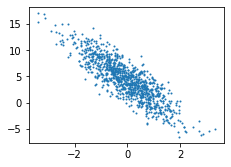

In [3]:
def set_figsize(figsize=(3.5, 2.5)):
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1], labels, 1)

## 3.2.2 read data

In [1]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = indices[i: min(i+batch_size, num_examples)]
        yield tf.gather(features, axis=0, indices=j), tf.gather(labels, axis=0, indices=j)

In [5]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

[[-1.8040096  -0.15478396]
 [ 0.30197513  0.7226112 ]
 [ 1.3643339   1.2256716 ]
 [ 0.64083093  0.00985407]
 [-0.9130684   1.2870392 ]
 [-0.73635167  0.8616958 ]
 [-1.3767787  -0.7688884 ]
 [ 0.26842278 -0.40469164]
 [ 1.1865063   0.6506257 ]
 [ 0.24220389  0.41220406]] [ 1.1166337   2.3442128   2.7511618   5.4408355  -2.003743   -0.19769916
  4.0604286   6.11232     4.3865256   3.3064191 ]


## 3.2.3 initialize weight

In [6]:
w = tf.Variable(tf.random.normal((num_inputs, 1), stddev=0.01))
b = tf.Variable(tf.zeros((1,)))

## 3.2.4 define model

In [7]:
def linreg(X, w, b):
    return tf.matmul(X, w) + b

## 3.2.5 define loss

In [8]:
def squared_loss(y_hat, y):
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 /2

## 3.2.6 define optimization

In [9]:
def sgd(params, lr, batch_size, grads):
    """Mini-batch stochastic gradient descent."""
    for i, param in enumerate(params):
        param.assign_sub(lr * grads[i] / batch_size)

## 3.2.7 training

In [10]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as t:
            t.watch([w,b])
            l = loss(net(X, w, b), y)
        grads = t.gradient(l, [w, b])
        sgd([w, b], lr, batch_size, grads)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, tf.reduce_mean(train_l)))

epoch 1, loss 0.028907
epoch 2, loss 0.000101
epoch 3, loss 0.000049


In [11]:
true_w, w

([2, -3.4], <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 1.9994558],
        [-3.3993363]], dtype=float32)>)

In [12]:
true_b, b

(4.2,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.199041], dtype=float32)>)